import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file and display of first few rows

df = pd.read_csv('C:/Users/999te/Downloads/gold_monthly_csv.csv')
num_rows = df.shape[0]
num_columns = df.shape[1]
start_date = df['Date'].iloc[0]
end_date = df['Date'].iloc[-1]
print(f"Gold price data has {num_rows} rows and {num_columns} columns.")
print(f"The date range of gold prices is from {start_date} to {end_date}")
df.head()

Gold price data has 847 rows and 2 columns.
The date range of gold prices is from 1950-01 to 2020-07


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
# EDA
# Create a new dataframe with monthly dates as the index
df.index = pd.date_range(start='1950-01-01', end='2020-08-01', freq='M')
df.drop('Date', axis=1, inplace=True)
df.head()

,Price
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


<Figure size 2000x800 with 0 Axes>

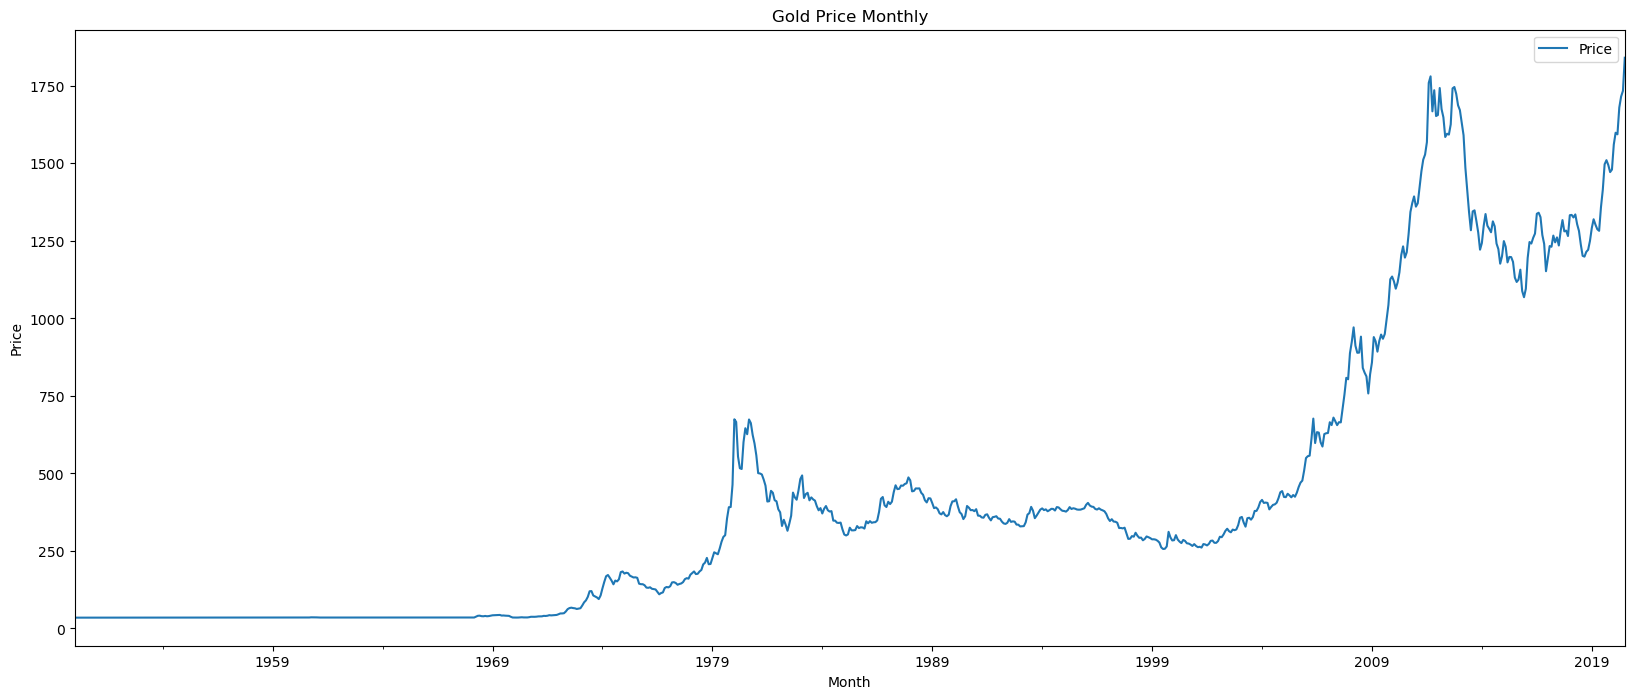

In [4]:

plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))
plt.title('Gold Price Monthly')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [5]:
print("Summary stats of gold prices:\n", df.describe())

Summary stats of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


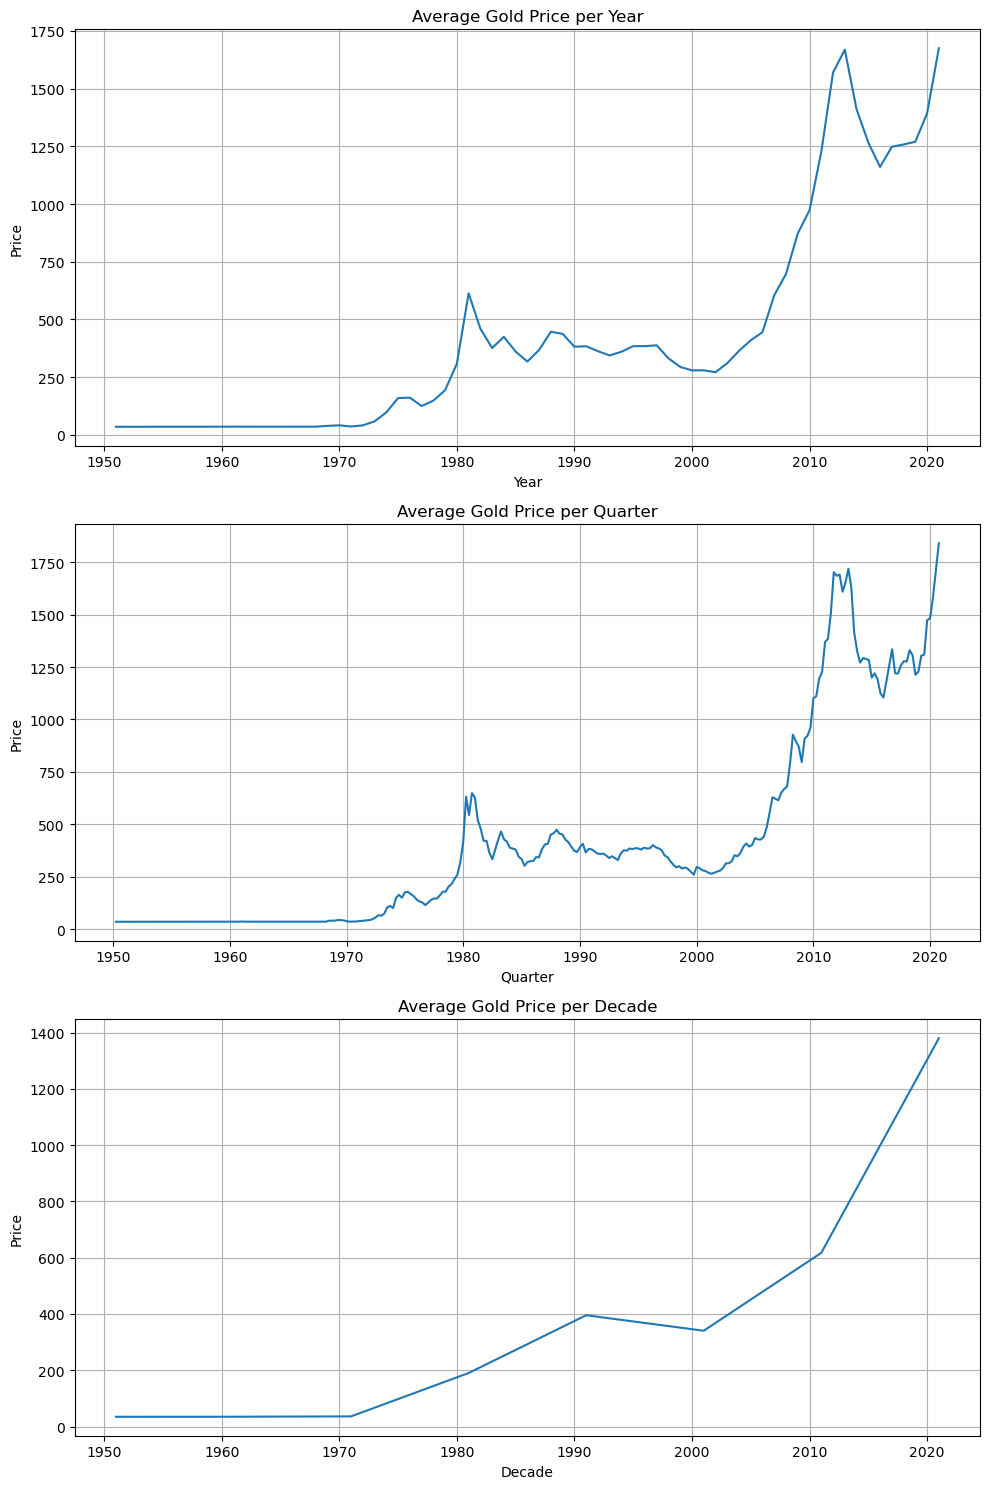

In [6]:

import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(10, 15)) 

# Plot Yearly data
df_yearly_sum = df.resample('A').mean()
axs[0].plot(df_yearly_sum.index, df_yearly_sum['Price'])
axs[0].set_title('Average Gold Price per Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Price')
axs[0].grid(True)

# Plot Quarterly data
df_quarterly_sum = df.resample('Q').mean()
axs[1].plot(df_quarterly_sum.index, df_quarterly_sum['Price'])
axs[1].set_title('Average Gold Price per Quarter')
axs[1].set_xlabel('Quarter')
axs[1].set_ylabel('Price')
axs[1].grid(True)

# Plot Decade data
df_decade_sum = df.resample('10Y').mean()
axs[2].plot(df_decade_sum.index, df_decade_sum['Price'])
axs[2].set_title('Average Gold Price per Decade')
axs[2].set_xlabel('Decade')
axs[2].set_ylabel('Price')
axs[2].grid(True)
plt.tight_layout()
plt.show()


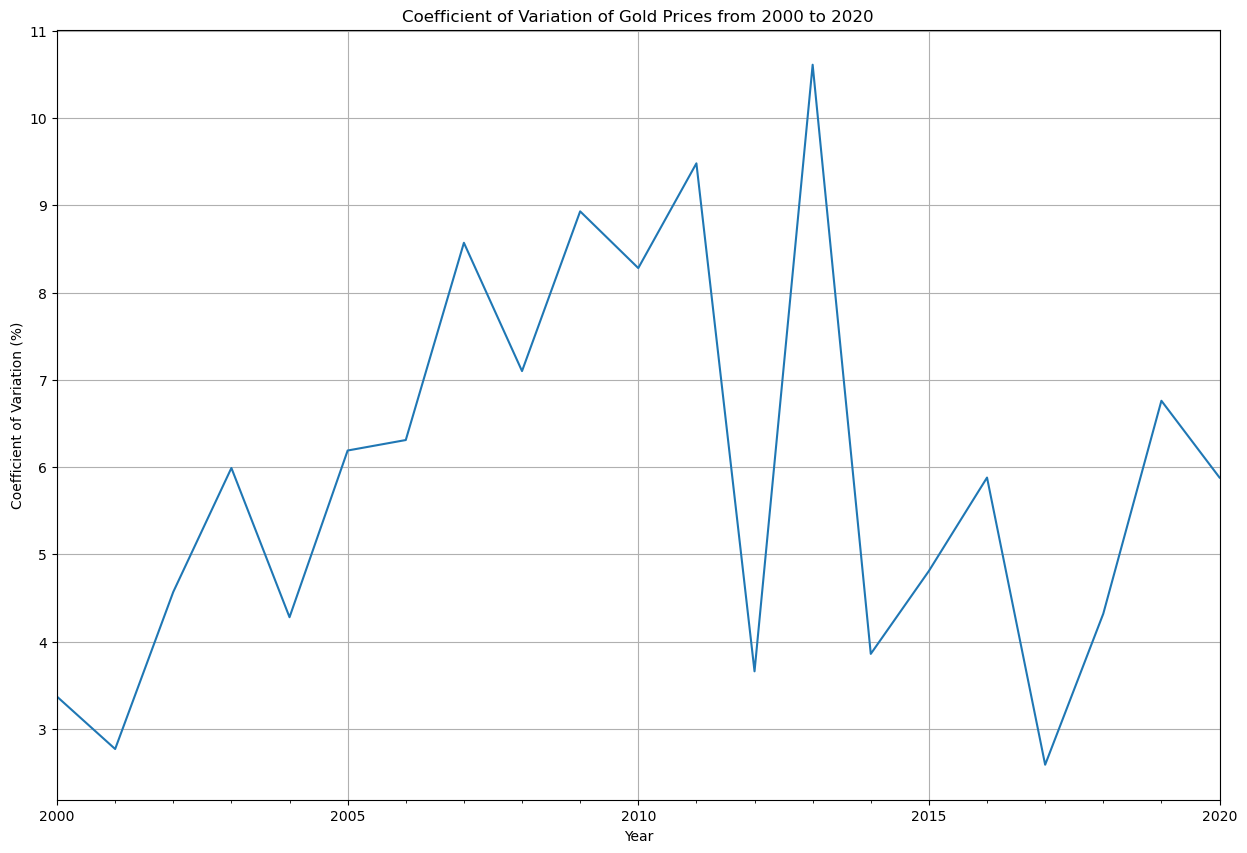

Few rows of the coefficient of variation data from 2000 to 2020
                  Mean        Std   Cov
2000-12-31  279.284000   9.412260  3.37
2001-12-31  271.097833   7.518510  2.77
2002-12-31  310.199417  14.190094  4.57
2003-12-31  363.676000  21.785067  5.99
2004-12-31  409.333583  17.539157  4.28


In [7]:

# Calculate mean, standard deviation, and coefficient of variation by year
df_1 = df.resample('A').agg({
    'Price': ['mean', 'std']
}).rename(columns={'mean': 'Mean', 'std': 'Std'})
df_1.columns = df_1.columns.droplevel(0)  # Flatten the column MultiIndex

# Calculate the coefficient of variation as a percentage
df_1['Cov'] = (df_1['Std'] / df_1['Mean'] * 100).round(2)

# Filter the data for years 2000 to 2020
df_filtered = df_1.loc['2000':'2020']

# Plot the CV over time for filtered data
fig, ax = plt.subplots(figsize=(15, 10))
df_filtered['Cov'].plot(ax=ax)
ax.set_title('Coefficient of Variation of Gold Prices from 2000 to 2020')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient of Variation (%)')
ax.grid(True)
plt.show()

# Display the first few rows of the filtered data
print('Few rows of the coefficient of variation data from 2000 to 2020')
print(df_filtered.head())


Shape of the training data: (684, 1)
Shape of the testing data: (163, 1)
Data percentage in the training set: 80.76%
Data percentage in the testing set: 19.24%


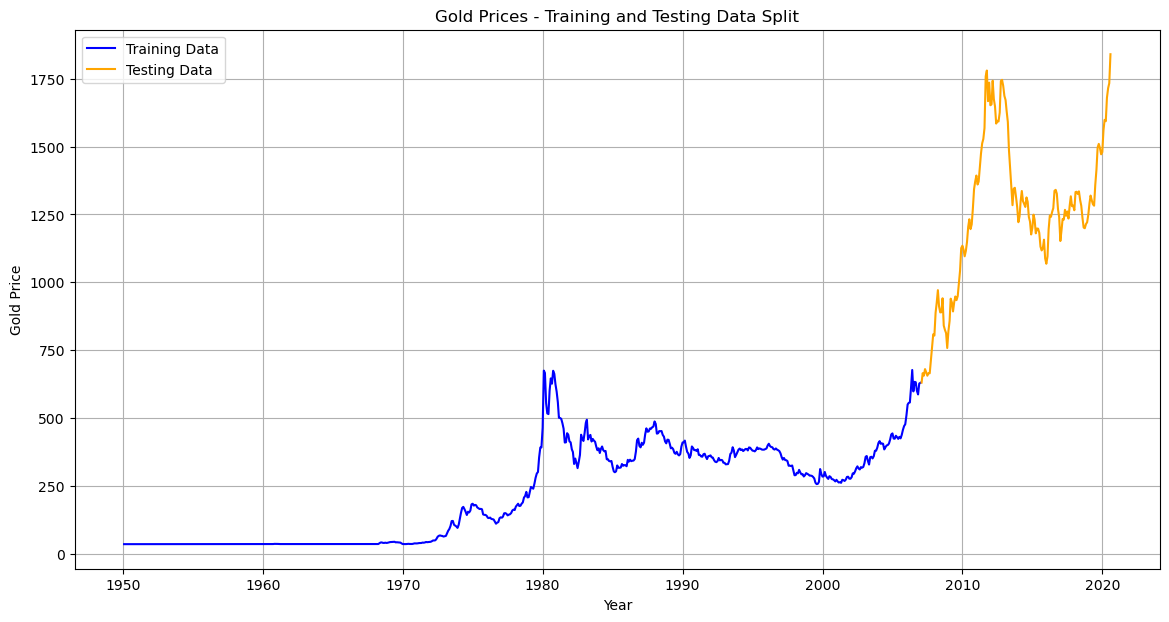

In [15]:
# Split the dataset into training and testing sets 
training_data = df[df.index.year <= 2006]
testing_data = df[df.index.year > 2006]

# Display the shape of the training and testing datasets
print("Shape of the training data:", training_data.shape)
print("Shape of the testing data:", testing_data.shape)

# Calculate and display the percentage of data in each set
percentage_training = (len(training_data) / len(df)) * 100
percentage_testing = (len(testing_data) / len(df)) * 100
print(f"Data percentage in the training set: {round(percentage_training, 2)}%")
print(f"Data percentage in the testing set: {round(percentage_testing, 2)}%")

import matplotlib.pyplot as plt

# Plot both training and testing data to visualize the split
plt.figure(figsize=(14, 7))  
plt.plot(training_data['Price'], label='Training Data', color='blue')
plt.plot(testing_data['Price'], label='Testing Data', color='orange')

# Adding title and labels
plt.title('Gold Prices - Training and Testing Data Split')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.legend()  
plt.grid(True)
plt.show()




In [9]:
# ExponentialSmoothing model

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Model fitting
model = ExponentialSmoothing(df['Price'], 
                                   trend='add', 
                                   seasonal='add', 
                                   seasonal_periods=12).fit(
    smoothing_level=0.4, 
    smoothing_slope=0.3, 
    smoothing_seasonal=0.6)

# Calculate MAPE function
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE of the fitted values
mape_model = mape(df['Price'].values, model.fittedvalues)
print('MAPE of ExponentialSmoothing model: %.3f%%' % mape_model)


MAPE of ExponentialSmoothing model: 17.235%


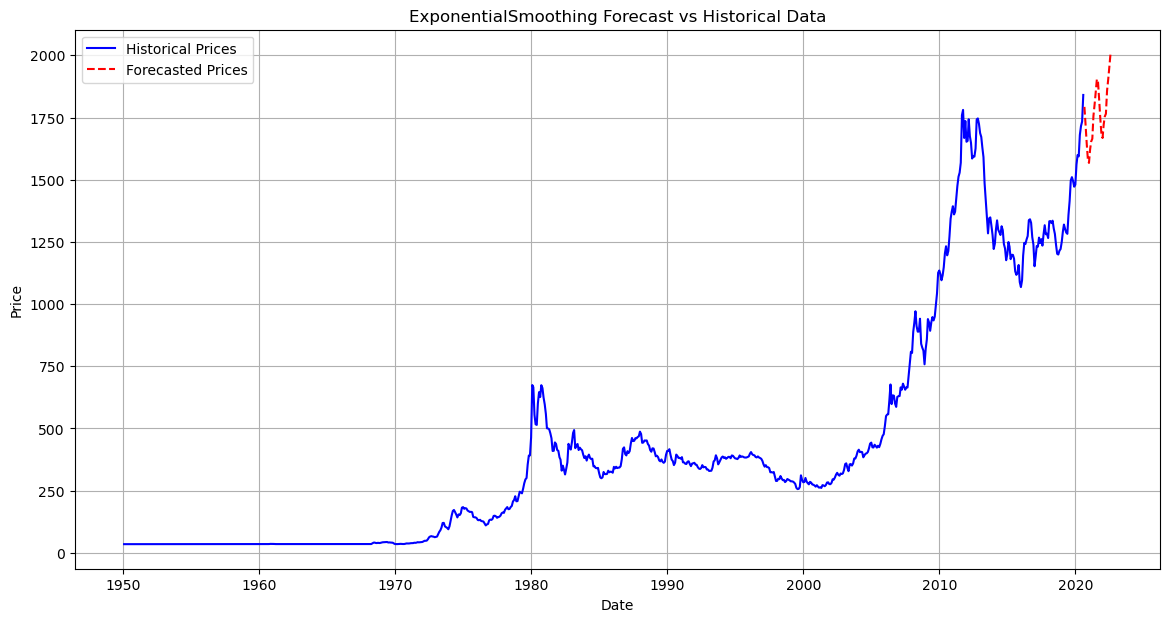

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecast future values - let's say for the next 24 months
forecast_horizon = 24
future_dates = pd.date_range(start=df.index[-1], periods=forecast_horizon + 1, freq='M')[1:]
forecast_values = model.forecast(steps=forecast_horizon)

# Create a plot to compare the historical data with the forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Price'], label='Historical Prices', color='blue')
plt.plot(future_dates, forecast_values, label='Forecasted Prices', color='red', linestyle='--')

# Adding title and labels
plt.title('ExponentialSmoothing Forecast vs Historical Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [12]:
# ARIMA Model

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assume df is your DataFrame and it has a datetime index
model_arima = ARIMA(df['Price'], order=(1,1,1))  
fitted_model_arima = model_arima.fit()

# Make predictions
predictions_arima = fitted_model_arima.forecast(steps=5) 
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape_arima = mape(df['Price'].values[-5:], predictions_arima)
print(f'MAPE for ARIMA model: {mape_arima:.3f}%')


MAPE for ARIMA model: 8.382%


Future Predicted Values:
2020-08-31    1857.333553
2020-09-30    1848.411820
2020-10-31    1853.228149
2020-11-30    1850.628091
2020-12-31    1852.031712
2021-01-31    1851.273978
2021-02-28    1851.683035
2021-03-31    1851.462209
2021-04-30    1851.581420
2021-05-31    1851.517065
2021-06-30    1851.551807
2021-07-31    1851.533052
2021-08-31    1851.543176
2021-09-30    1851.537711
2021-10-31    1851.540661
2021-11-30    1851.539068
2021-12-31    1851.539928
2022-01-31    1851.539464
2022-02-28    1851.539715
2022-03-31    1851.539579
Freq: M, Name: predicted_mean, dtype: float64


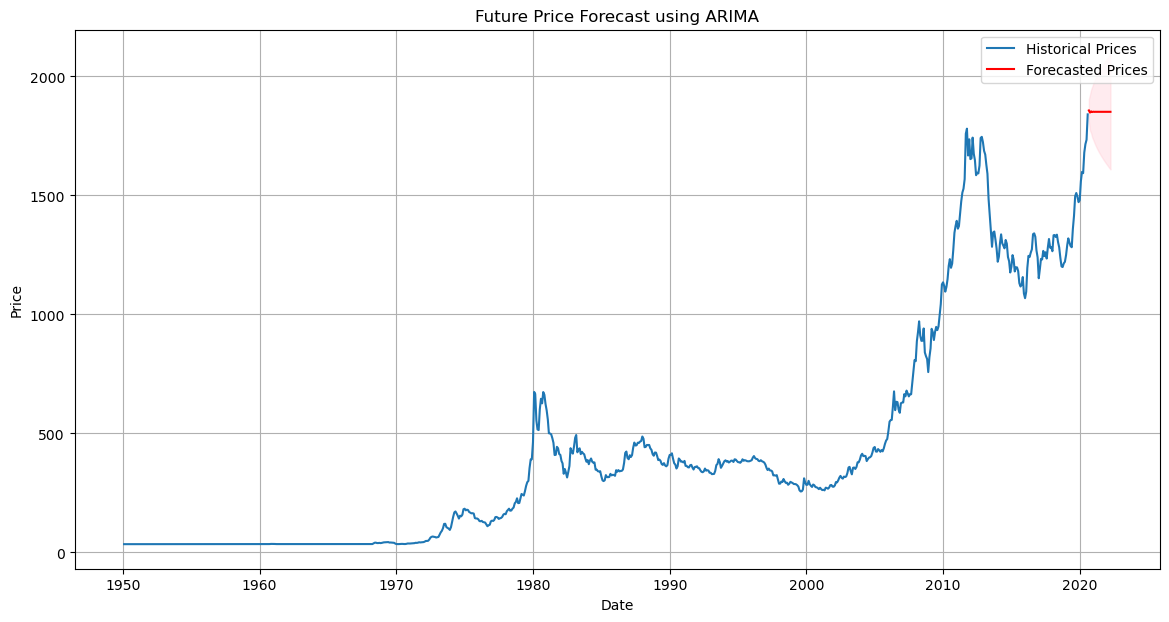

In [14]:
# Future prediction values using ARIMA MODEL
future_steps = 20
future_predictions = fitted_model_arima.get_forecast(steps=future_steps)
future_means = future_predictions.predicted_mean

print("Future Predicted Values:")
print(future_means)
# Get Confidence Intervals
future_conf_int = future_predictions.conf_int()
# Assume the last date in df is at index -1
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]  # Adjust 'freq' as per your data frequency
# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_means,
    'Lower_CI': future_conf_int.iloc[:, 0],
    'Upper_CI': future_conf_int.iloc[:, 1]
}).set_index('Date')

import matplotlib.pyplot as plt

# Plot historical and predicted prices with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Price'], label='Historical Prices')
plt.plot(future_df.index, future_df['Predicted_Price'], label='Forecasted Prices', color='red')
plt.fill_between(future_df.index, 
                 future_df['Lower_CI'], 
                 future_df['Upper_CI'], color='pink', alpha=0.3)
plt.title('Future Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
